### Importing Necessary Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset

In [36]:
df = pd.read_csv('data/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [38]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Data Cleaning & Visualization

In [39]:
# Checking for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [40]:
# Dropping irrelevant columns (features)
df.drop(['CustomerID'], axis=1, inplace=True)

In [41]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [42]:
# Using LabelEncoder for the gender feature
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [43]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


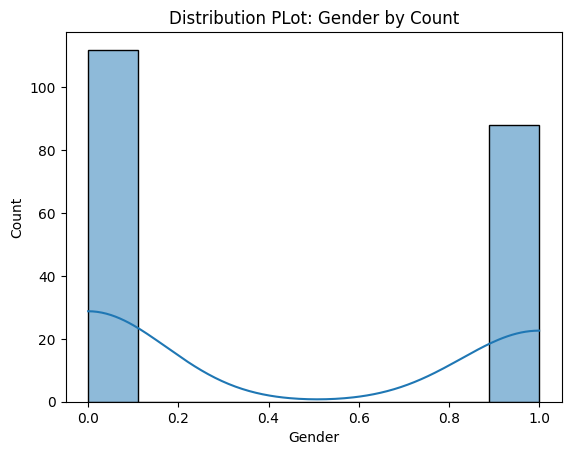

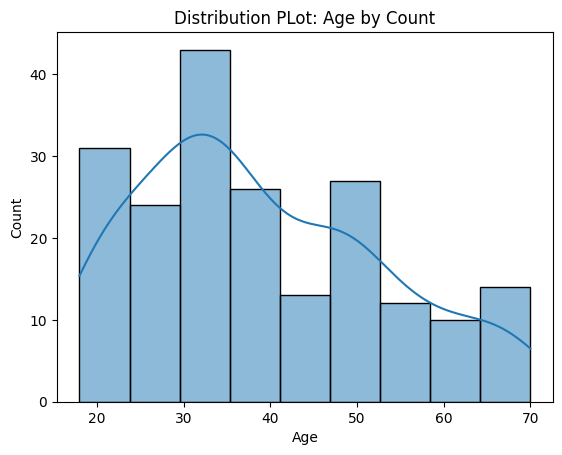

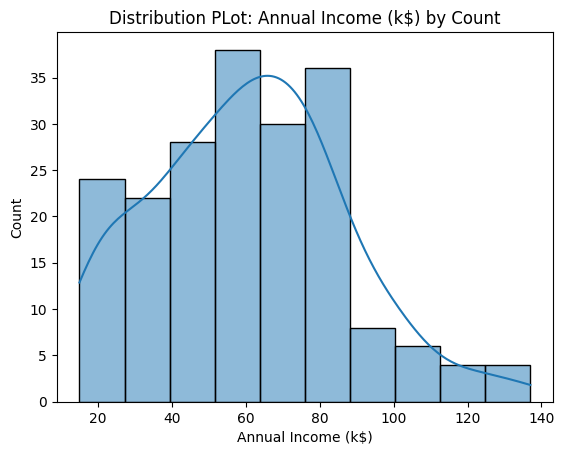

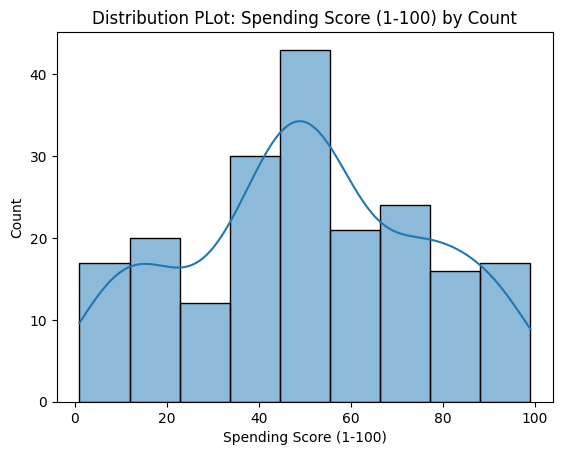

In [44]:
# Encoding
# Male: 1, Female: 0

# Creating a distribution plot: count vs every feature
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution Plot: {col} by Count')
    plt.show()

In [45]:
# Insights: Gender/Age/Income/SpendingScore vs Count

# 1. Slightly more female than male
# 2. Highest density in 30s age group
# 3. Most of the people have income between $60K - $80K
# 4. Most people have spending score around 50

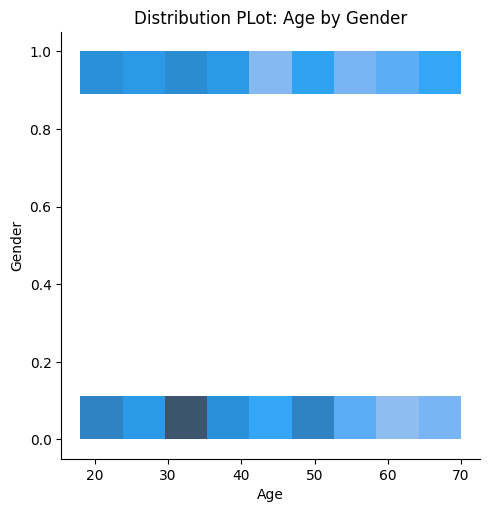

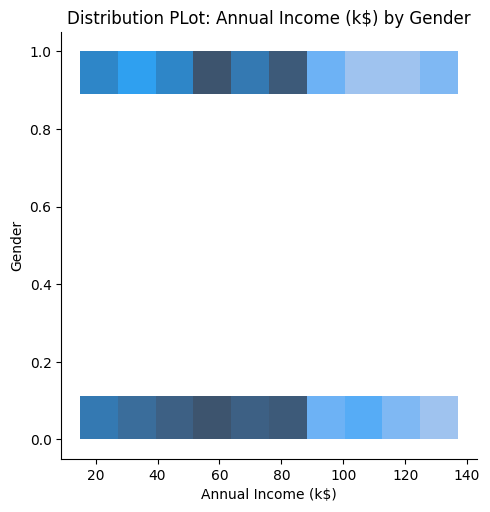

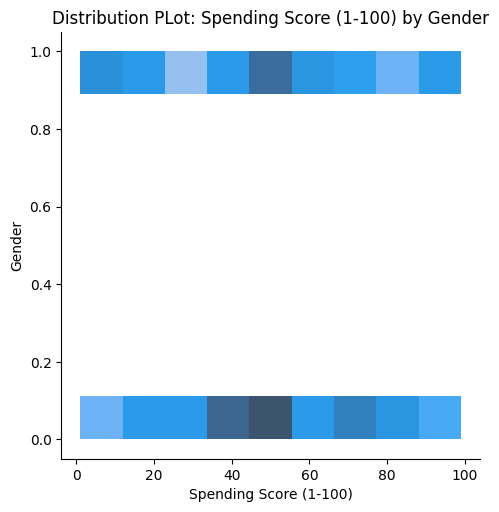

In [46]:
# Creating a distribution plot: gender vs every feature
for col in df.columns:
    if col != 'Gender':
        sns.displot(x=df[col], y=df['Gender'], data=df)
        plt.title(f'Distribution PLot: {col} by Gender')
        plt.show

In [47]:
# Insights: Gender vs Age/Income/SpendingScore

# 1. Very high density of 30-35 age group in females
# 2. Both female and male have high density in $60-80K income
# 3. Both female and male have high density of spending score around 50

In [48]:
# Dividing age into different groups
age_18_to_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_to_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_to_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_to_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 56]

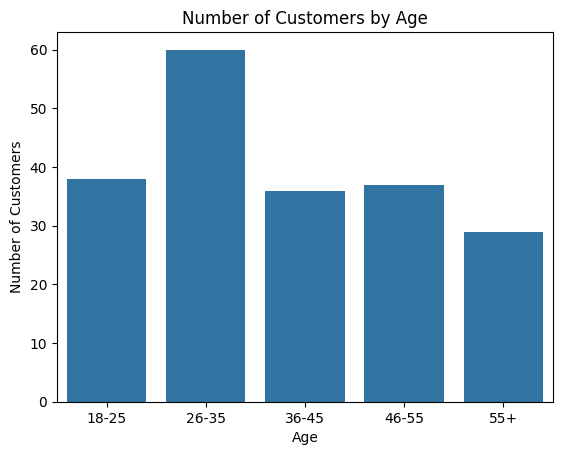

In [50]:
# Plotting the number of customer by age groups
age_x = ['18-25', '26-35', '36-45', '46-55', '55+']
age_y = [len(age_18_to_25.values), len(age_26_to_35.values), len(age_36_to_45.values), len(age_46_to_55.values), len(age_55above.values)]
sns.barplot(x=age_x, y=age_y)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Age')
plt.show()

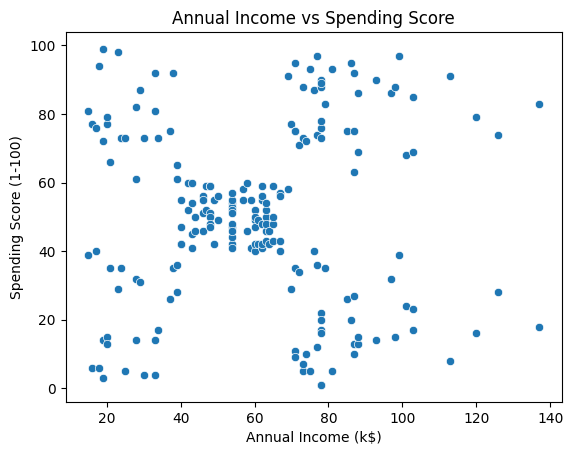

In [51]:
# Relatioship: Annual Income vs Spending Score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs Spending Score')
plt.show()

In [52]:
# Dividing spending score into different groups
ss_1_to_20 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 1) & (df['Spending Score (1-100)'] <= 20)]
ss_21_to_40 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]
ss_41_to_60 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
ss_61_to_80 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
ss_81_to_100 = df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >= 81) & (df['Spending Score (1-100)'] <= 100)]

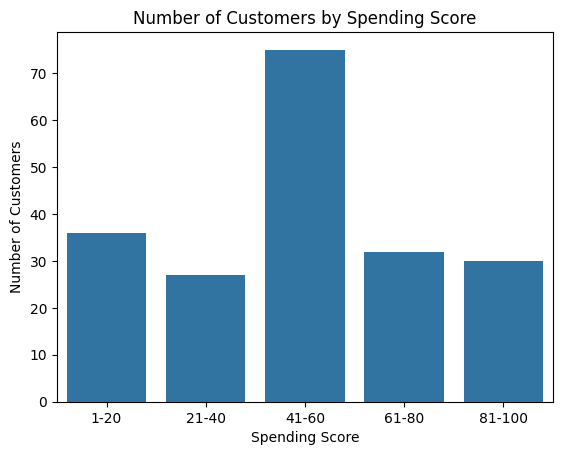

In [53]:
# Plotting the number of customers vs spending score
ss_x = ['1-20', '21-40', '41-60', '61-80', '81-100']
ss_y = [len(ss_1_to_20.values), len(ss_21_to_40.values), len(ss_41_to_60.values), len(ss_61_to_80.values), len(ss_81_to_100.values)]
sns.barplot(x=ss_x, y=ss_y)
plt.xlabel('Spending Score')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Spending Score')
plt.show()

In [59]:
# Dividing annual income into different groups
ai_0_to_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]
ai_30_to_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] > 30) & (df['Annual Income (k$)'] <= 60)]
ai_60_to_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] > 60) & (df['Annual Income (k$)'] <= 90)]
ai_90_to_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] > 90) & (df['Annual Income (k$)'] <= 120)]
ai_120above = df['Annual Income (k$)'][df['Annual Income (k$)'] > 120]

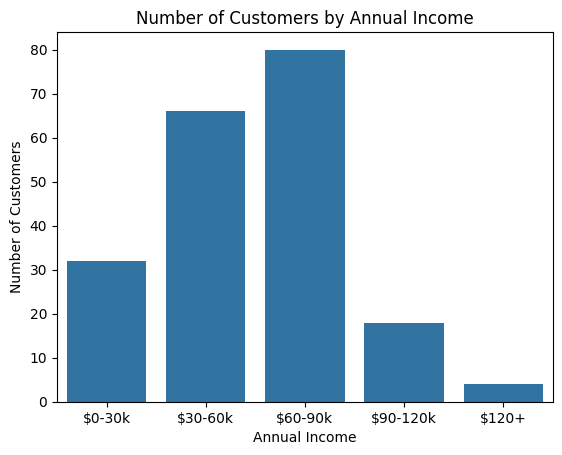

In [60]:
# Plotting the number of customers vs annual income
ai_x = ['$0-30k', '$30-60k', '$60-90k', '$90-120k', '$120+']
ai_y = [len(ai_0_to_30.values), len(ai_30_to_60.values), len(ai_60_to_90.values), len(ai_90_to_120.values), len(ai_120above.values)]
sns.barplot(x=ai_x, y=ai_y)
plt.xlabel('Annual Income')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Annual Income')
plt.show()

### Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

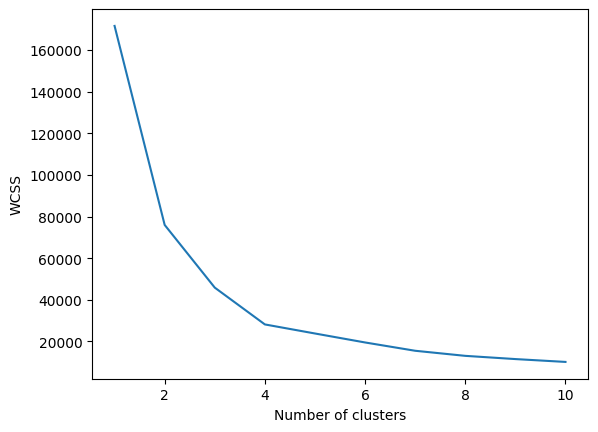

In [72]:
# Clusters between Age and Spending Score

# Finding optimum number of clusters
x1 = df.loc[:, ['Age', 'Spending Score (1-100)']].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [75]:
# After k=4, the graph tends to go constant
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(x1)

# Checking the centroids
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [55.70833333 48.22916667]
 [27.61702128 49.14893617]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


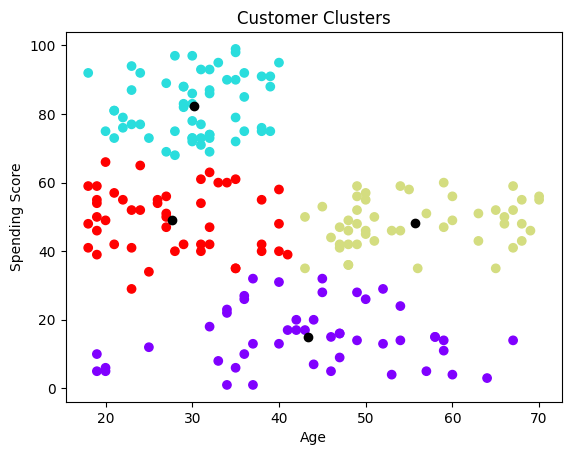

In [76]:
# Visualizing the clusters using scatterplot
plt.scatter(x1[:, 0], x1[:, 1], c=y_kmeans, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')
plt.title('Customer Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

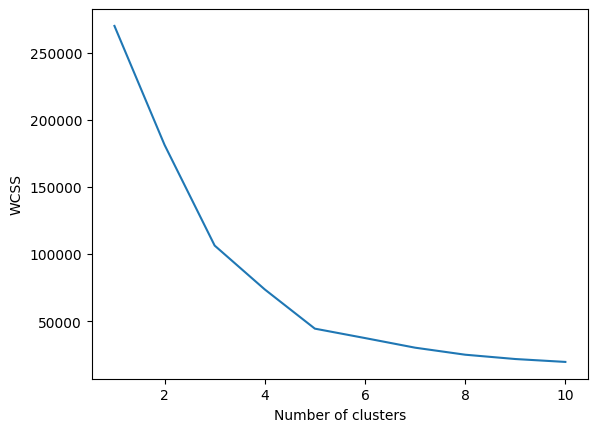

In [77]:
# Clusters between annual income and spending score

# Finding optimum number of clusters
x2 = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [78]:
# k=5

kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(x2)

# Checking the centroids
print(kmeans.cluster_centers_)

[[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [88.2        17.11428571]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

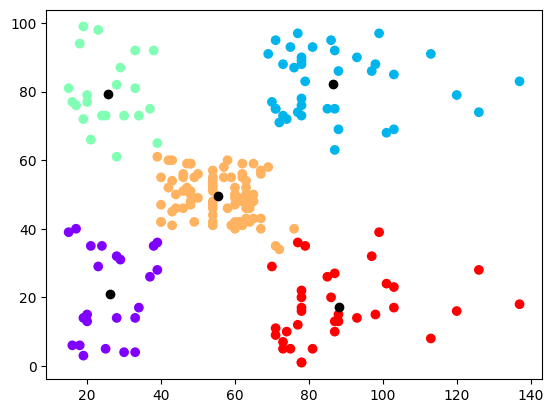

In [79]:
# Visualizing the clusters

plt.scatter(x2[:, 0], x2[:, 1], c=y_kmeans, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black')
plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

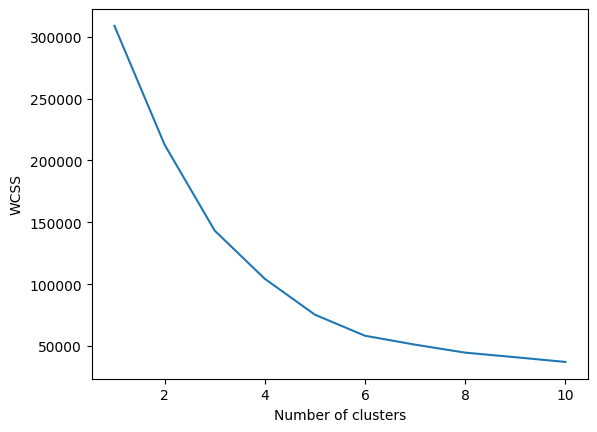

In [81]:
# Clusters considering all three features (3d)

x3 = df.iloc[:, 1:].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [82]:
# k=6

kmeans = KMeans(n_clusters=6)
y_kmeans = kmeans.fit_predict(x3)

# Checking the centroids
print(kmeans.cluster_centers_)

[[41.68571429 88.22857143 17.28571429]
 [27.         56.65789474 49.13157895]
 [56.15555556 53.37777778 49.08888889]
 [32.69230769 86.53846154 82.12820513]
 [44.14285714 25.14285714 19.52380952]
 [25.27272727 25.72727273 79.36363636]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


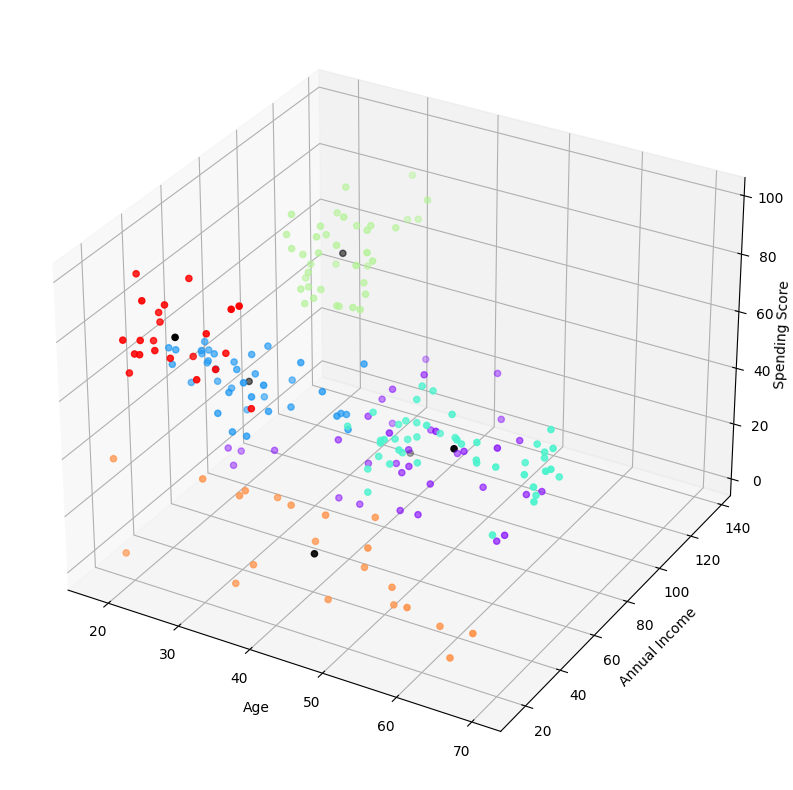

In [89]:
# Visualizing the 3d cluster

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x3[:, 0], x3[:, 1], x3[:, 2], c=y_kmeans, cmap='rainbow')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], color='black')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score', labelpad=-1)
plt.show()